# Pymaceuticals Inc.
---

### Analysis

The information provided tracks the growth of cancerous tumors (squamous cell carcinoma (SCC)) over the span of a 45 day period in a group of mice. These mice were given varying treatment regimens over that period of time, and the effectiveness of reach treatment was tracked by monitoring the growth of these tumors. 

Treatments trialed on these mice, Capomulin (40.68 (mm3)) and Ramicane(40.21 (mm3))demonstrated the most effectiveness in slowing the growth of the tumors, with each of these treatments averaging more than a 10mm3 reduction in tumor volume over  the course of the study when compared to the placebo group (54.03 (mm3)). 

These two drugs also demonstrated the lowest variance and standard divations of the test groups, which demonstrates a consistency of outcome when compared to the other trial groups. 


In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
complete_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = complete_data[complete_data.duplicated()]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = complete_data.loc[complete_data["Mouse ID"] == "g989",:]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data = complete_data[complete_data["Mouse ID"] != "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
complete_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_df = complete_data.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": group_df["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume": group_df["Tumor Volume (mm3)"].median(),
    "Variance Tumor Volume": group_df["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.": group_df["Tumor Volume (mm3)"].std(),
    "Tumor Volume Std. Err.": group_df["Tumor Volume (mm3)"].sem()
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_df = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({"mean","median","var","std","sem"})
agg_df

,median,sem,mean,var,std
Drug Regimen,,,,,
Capomulin,41.557809,0.329346,40.675741,24.947764,4.994774
Ceftamin,51.776157,0.469821,52.591172,39.290177,6.268188
Infubinol,51.820584,0.492236,52.884795,43.128684,6.567243
Ketapril,53.698743,0.603860,55.235638,68.553577,8.279709
Naftisol,52.509285,0.596466,54.331565,66.173479,8.134708
Placebo,52.288934,0.581331,54.033581,61.168083,7.821003
Propriva,50.446266,0.544332,52.320930,43.852013,6.622085
Ramicane,40.673236,0.320955,40.216745,23.486704,4.846308
Stelasyn,52.431737,0.573111,54.233149,59.450562,7.710419


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

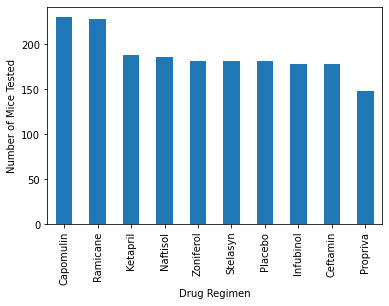

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
ax = complete_data["Drug Regimen"].value_counts().plot(kind="bar")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

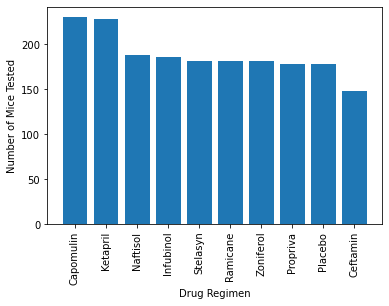

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(complete_data["Drug Regimen"].unique(),complete_data["Drug Regimen"].value_counts())
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

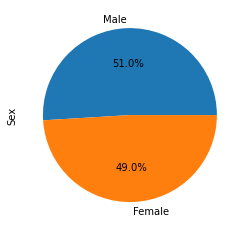

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf = complete_data["Sex"].value_counts().plot.pie(autopct="%1.1f%%")


Text(0, 0.5, 'Sex')

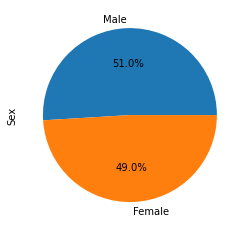

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(complete_data["Sex"].value_counts(), labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
time_df = complete_data.groupby("Mouse ID")
time_df = time_df["Timepoint"].max()
time_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
complete_merge_df = pd.merge(time_df, complete_data, how="left", on=["Mouse ID", "Timepoint"])

In [119]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes = complete_merge_df["Tumor Volume (mm3)"].loc[complete_merge_df["Drug Regimen"] == treatment]
    volumes = round(volumes,2)
    volumes.name = treatment
    tumor_vol.append(volumes)
    

    # add subset 
    
    # Determine outliers using upper and lower bounds
for series in tumor_vol:
    analysis = round(series.describe(),2)
    analysis["IQR"] = (analysis["75%"] - analysis["25%"])
    analysis["UpperB"] = analysis["75%"] + (analysis["IQR"] * 1.5)
    analysis["LowerB"] = analysis["25%"] - (analysis["IQR"] * 1.5)
    for x in series: 
        if x < analysis["LowerB"] or x > analysis["UpperB"]:
            print(f"{series.name} has an outlier of {x}")
        
# print(analysis)

Infubinol has an outlier of 36.32


Text(0, 0.5, 'Final Tumor Volume (mm3)')

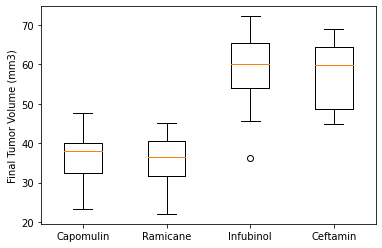

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomilin treatment of mouse l509')

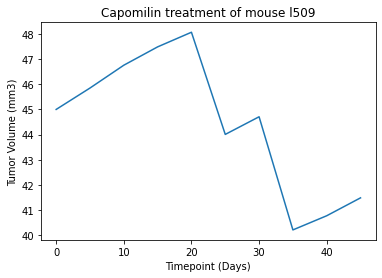

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data = complete_data.loc[complete_data["Mouse ID"] == "l509"]
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomilin treatment of mouse l509")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

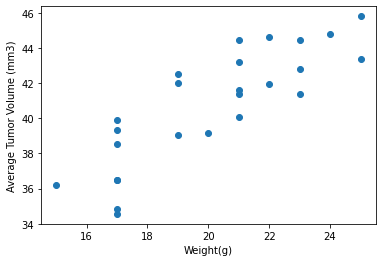

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = complete_data.loc[complete_data["Drug Regimen"] == "Capomulin"]
Capomulin_mean = Capomulin_df.groupby(["Mouse ID"]).mean()
Capomulin_mean
plt.scatter(Capomulin_mean["Weight (g)"],Capomulin_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

Text(0.5, 1.0, 'The correlatiion between mouse weight and the average tumor volume is 0.84')

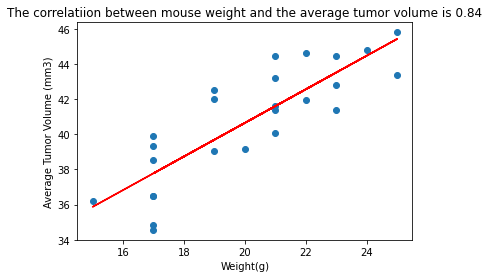

In [72]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Capomulin_mean["Weight (g)"],Capomulin_mean["Tumor Volume (mm3)"])
regress_value = slope * Capomulin_mean["Weight (g)"] + intercept

plt.scatter(Capomulin_mean["Weight (g)"],Capomulin_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(Capomulin_mean["Weight (g)"],regress_value, "r" )
rvaluer = round(rvalue,2)
plt.title(f"The correlatiion between mouse weight and the average tumor volume is {rvaluer}")
